In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df = pd.read_excel('financial_source.xlsx',sheet_name='Quarter Margins')
df['year_quater'] = df['Year'].dt.year.astype(str) + ",Q" + df['Year'].dt.quarter.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Year                                 18 non-null     datetime64[ns]
 1   ByYear                               18 non-null     int64         
 2   GP Margin                            18 non-null     float64       
 3   OP Margin                            18 non-null     float64       
 4   PT Margin                            18 non-null     float64       
 5   NP Margin                            18 non-null     float64       
 6   总资产周转率 Total Assets Turnover         18 non-null     float64       
 7   应收账款周转天数 Days Sales Outstanding      18 non-null     float64       
 8   应付账款周转天数 Days Payables Outstanding   18 non-null     float64       
 9   存货周转天数 Days Inventories Outstanding  18 non-null     float64       
 10  现金转换周期 Cash Conv

In [10]:
df['dr'] = (df['負債比率 Debt Ratio']*100).astype(float)
df['der'] = (df['债务股本比 Debt-to-Equity Ratio']*100).astype(float)
df['tat'] = (df['总资产周转率 Total Assets Turnover']*100).astype(float)
df[['dr','der','tat']].head()

,dr,der,tat
0,32.276163,47.658498,10.857479
1,33.187117,49.671733,10.163983
2,31.308473,45.578363,10.548205
3,19.294800,23.907753,10.589659
4,23.132359,30.093754,10.898588


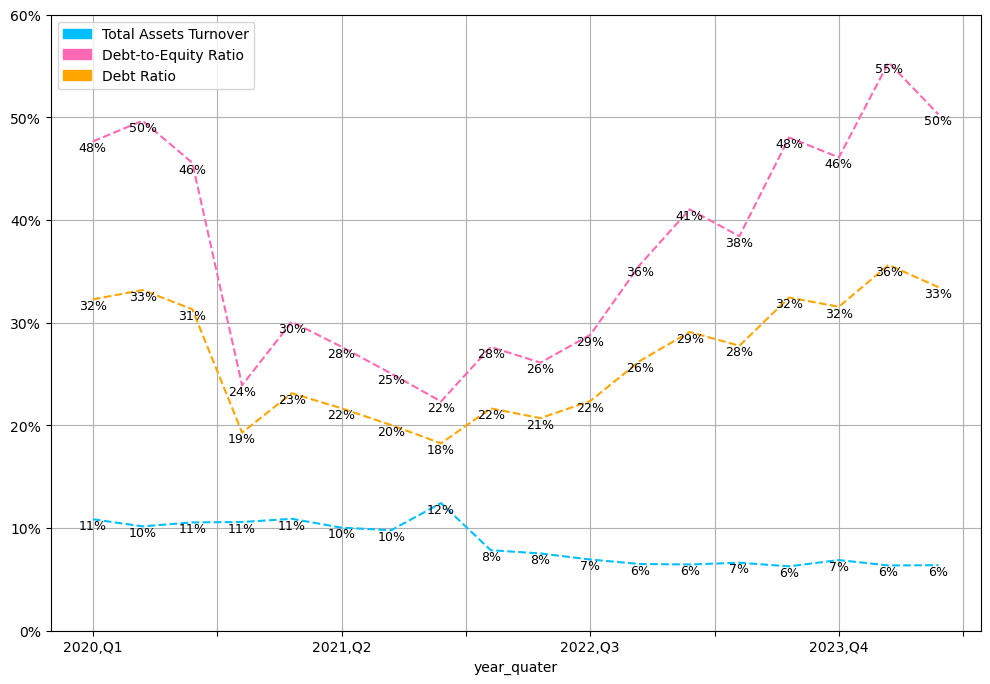

In [25]:
df_piv = df.pivot_table(
    index='year_quater',
    values=['dr', 'der', "tat"],
    aggfunc='sum'
)

custom_colors = ['hotpink', 'orange', 'deepskyblue']

ax = df_piv.plot(kind='line',style='--',figsize=(12,8),color=custom_colors)
plt.grid(visible=True)
plt.ylim(0,60)

plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.0f}%'))

# Add labels to the line points
for column in df_piv.columns:
    for x, y in enumerate(df_piv[column]):
        ax.text(x, y, f'{y:.0f}%', fontsize=9, ha='center', va='top')

tat = Patch(label='Total Assets Turnover',color='deepskyblue')
der = Patch(label='Debt-to-Equity Ratio',color='hotpink')
dr = Patch(label='Debt Ratio',color='orange')

plt.legend(handles=[tat,der,dr])
plt.show()